In [1]:
from __future__ import division
from matplotlib.pyplot import figure

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
n_bins=5000
df = pd.DataFrame()
for i in range(0,100):
    x=pd.read_csv('/broad/finucanelab/ktashman/inrich_analyses/simulations/meta_analysis_files/sim0_'+str(i)+'.sumstats.pruned.sim0_'+str(i)+'.exclude.meta.txt',sep='\t',header=0)
    df = df.append(x)



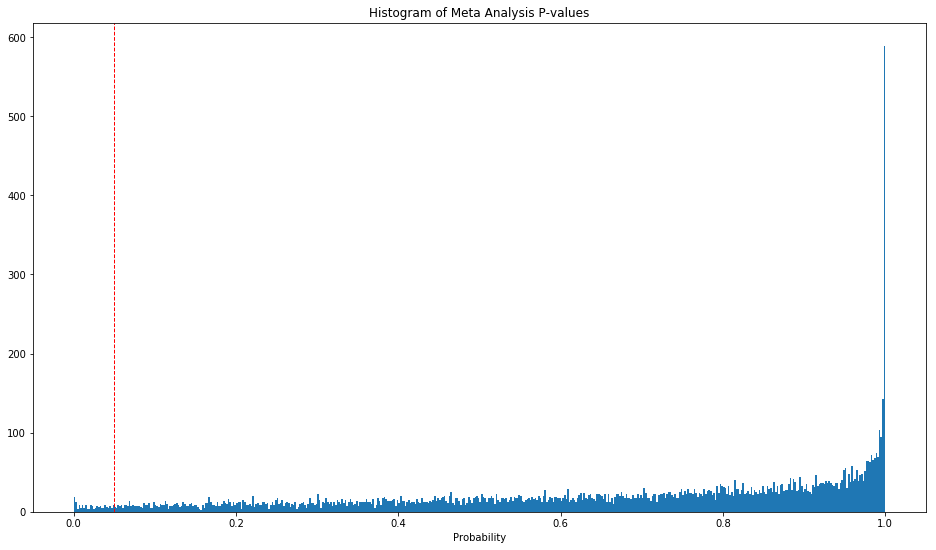

In [4]:
plt.rcParams["figure.figsize"] = [16,9]
plt.hist(df.meta_pval,bins=500)
plt.xlabel('Probability')
plt.axvline(x=.05, color='r', linestyle='dashed', linewidth=1)
plt.title("Histogram of Meta Analysis P-values");

In [5]:
under_thresh=len(df[df.meta_pval<.05])
print(under_thresh)
print(under_thresh/len(df))

170
0.017


In [6]:
len(df)

10000

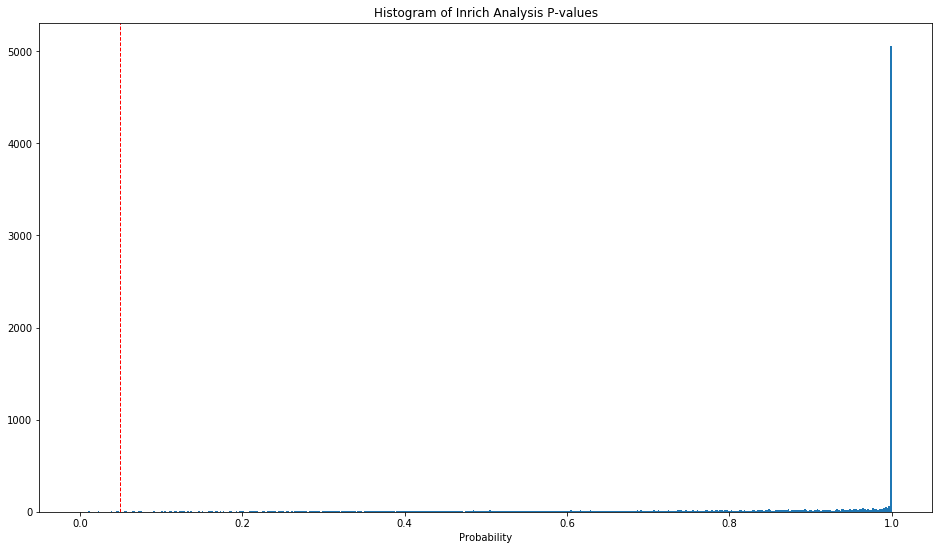

In [7]:
plt.rcParams["figure.figsize"] = [16,9]
plt.hist(df.P,bins=500)
plt.xlabel('Probability')
plt.axvline(x=.05, color='r', linestyle='dashed', linewidth=1)
plt.title("Histogram of Inrich Analysis P-values");

In [8]:
under_thresh_inrich=len(df[df.P<.05])
print(under_thresh_inrich)
print(under_thresh_inrich/len(df))

48
0.0048


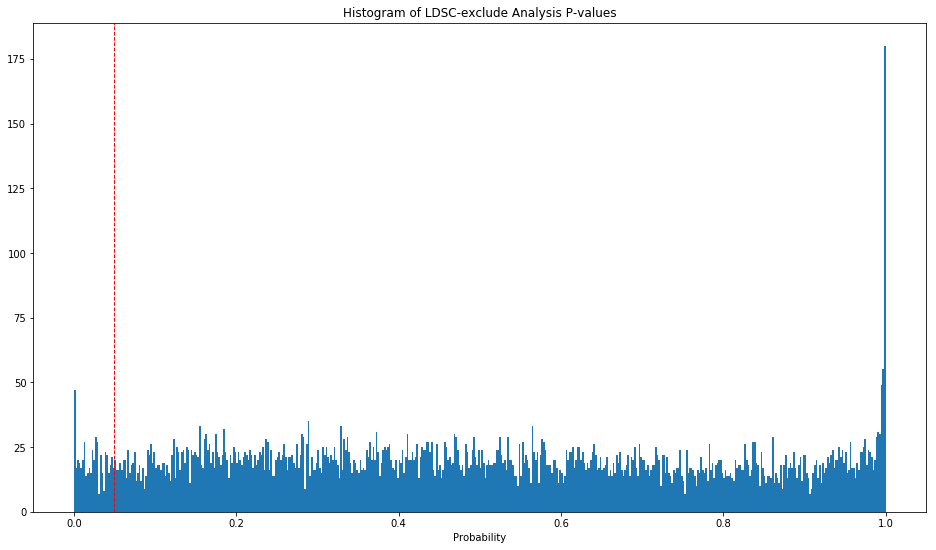

In [9]:
plt.rcParams["figure.figsize"] = [16,9]
plt.hist(df.Coefficient_P_value,bins=500)
plt.xlabel('Probability')
plt.axvline(x=.05, color='r', linestyle='dashed', linewidth=1)
plt.title("Histogram of LDSC-exclude Analysis P-values");

In [10]:
under_thresh_ldsc=len(df[df.Coefficient_P_value<.05])
print(under_thresh_ldsc)
print(under_thresh_ldsc/len(df))

496
0.0496


In [11]:
n_bins=5000
dfldsc = pd.DataFrame()
for i in range(0,100):
    x=pd.read_csv('/broad/finucanelab/ktashman/inrich_analyses/simulations/ldsc_simulations_full/sim0_'+str(i)+'.sumstats.pruned.sim0_'+str(i)+'.ldsc.cell_type_results.txt',sep='\t',header=0)
    dfldsc = dfldsc.append(x)




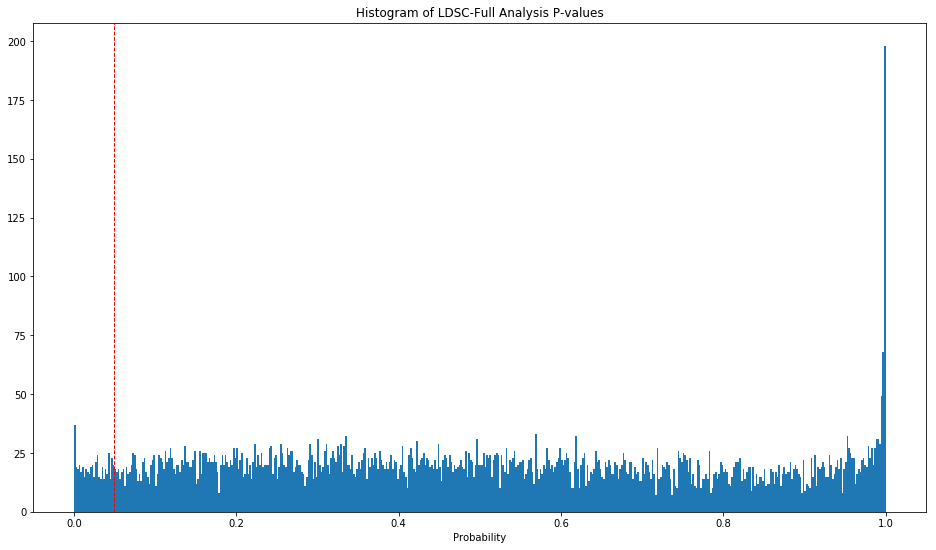

In [12]:
plt.rcParams["figure.figsize"] = [16,9]
plt.hist(dfldsc.Coefficient_P_value,bins=500)
plt.xlabel('Probability')
plt.axvline(x=.05, color='r', linestyle='dashed', linewidth=1)
plt.title("Histogram of LDSC-Full Analysis P-values");

In [13]:
under_thresh_ldscfull=len(dfldsc[dfldsc.Coefficient_P_value<.05])
print(under_thresh_ldscfull)
print(under_thresh_ldscfull/len(dfldsc))

473
0.0473


In [14]:
import math
import scipy
from scipy import stats
import copy
import numpy as np

In [15]:
def fdr(p):
    p = copy.deepcopy(p)
    p.sort()
    c = np.arange(1,len(p)+1)*0.05/len(p)
    cutoff_fdr = 0
    for i in range(len(p)):
        if p[i] < c[i]:
            cutoff_fdr = p[i]
    return cutoff_fdr

In [16]:
cutoff_meta = fdr(df.meta_pval.values)*1.00001

In [17]:
cutoff_ldsc = fdr(df.Coefficient_P_value.values)*1.00001

In [18]:
cutoff_inrich = fdr(df.P.values)*1.00001

In [27]:
df[df.P<cutoff_inrich]

,GS,SIZE,chisq,meta_pval,pass_meta,pass_LDSC,pass_INRICH,Coefficient_P_value,P


In [26]:
df[df.Coefficient_P_value<cutoff_ldsc]

,GS,SIZE,chisq,meta_pval,pass_meta,pass_LDSC,pass_INRICH,Coefficient_P_value,P
0,KORKOLA_TERATOMA_UP_L2_,16,38.476321,8.936018e-08,True,False,False,4.415430e-09,1.0
0,POSITIVE_REGULATION_OF_CYTOSKELETON_ORGANIZATI...,10,27.351307,1.687861e-05,True,False,False,1.150110e-06,1.0
0,ST_IL_13_PATHWAY_L2_,5,23.911607,8.320029e-05,True,False,False,6.421855e-06,1.0
0,BIOCARTA_CLASSIC_PATHWAY_L2_,12,25.636502,3.745911e-05,True,False,False,2.710843e-06,1.0


In [25]:
df[df.meta_pval<cutoff_meta]

,GS,SIZE,chisq,meta_pval,pass_meta,pass_LDSC,pass_INRICH,Coefficient_P_value,P
0,KORKOLA_TERATOMA_UP_L2_,16,38.476321,8.936018e-08,True,False,False,4.415430e-09,1.0


In [24]:
df[df.GS=='KORKOLA_TERATOMA_UP_L2_'].sort_values(by='meta_pval')

,GS,SIZE,chisq,meta_pval,pass_meta,pass_LDSC,pass_INRICH,Coefficient_P_value,P
0,KORKOLA_TERATOMA_UP_L2_,16,3.847632e+01,8.936018e-08,True,False,False,4.415430e-09,1.0
2,KORKOLA_TERATOMA_UP_L2_,16,1.832961e+01,1.063839e-03,True,False,False,1.046591e-04,1.0
1,KORKOLA_TERATOMA_UP_L2_,16,1.149731e+01,2.150841e-02,False,False,False,3.187067e-03,1.0
1,KORKOLA_TERATOMA_UP_L2_,16,1.008880e+01,3.895819e-02,False,False,False,6.445339e-03,1.0
1,KORKOLA_TERATOMA_UP_L2_,16,7.169875e+00,1.271788e-01,False,False,False,2.773840e-02,1.0
3,KORKOLA_TERATOMA_UP_L2_,16,6.411950e+00,1.704235e-01,False,False,False,4.051938e-02,1.0
26,KORKOLA_TERATOMA_UP_L2_,16,6.280367e+00,1.791659e-01,False,False,False,4.327487e-02,1.0
7,KORKOLA_TERATOMA_UP_L2_,16,6.025262e+00,1.972696e-01,False,False,False,4.916217e-02,1.0
9,KORKOLA_TERATOMA_UP_L2_,16,4.603142e+00,3.304921e-01,False,False,False,1.001015e-01,1.0
10,KORKOLA_TERATOMA_UP_L2_,16,4.430944e+00,3.508144e-01,False,False,False,1.091020e-01,1.0
